# Adding duration categories
Now that you've set up the categories and values you want to capture, it's time to build a new column to analyze the frequency of flights by duration!

The variables `flight_categories`, `short_flights`, `medium_flights`, and `long_flights` that you previously created are available to you.

Additionally, the following packages have been imported: `pandas` as `pd`, `numpy` as `np`, `seaborn` as `sns`, and `matplotlib.pyplot` as `plt`.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
planes= pd.read_csv(r"D:\Cursos\Data_Science_Python\data_sets\planesv2.csv")

# Find the five percent threshold
threshold = len(planes) * 0.05
# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]
planes=planes.drop('Additional_Info',axis=1)
# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)
airline_prices = planes.groupby("Airline")["Price"].median()
prices_dict = airline_prices.to_dict()
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))
planes.head(3)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302.0


In [2]:
flight_categories = ["Short-haul", "Medium", "Long-haul"]
short_flights = "^0h|^1h|^2h|^3h|^4h"
medium_flights = "^5h|^6h|^7h|^8h|^9h"
long_flights = "^10h|^11h|^12h|^13h|^14h|^15h|^16h"

* Create `conditions`, a list containing subsets of `planes["Duration"]` based on `short_flights`, medium_flights, and long_flights.
* Create the `"Duration_Category"` column by calling a function that accepts your `conditions` list and `flight_categories`, setting values not found to `"Extreme duration`".
* Create a plot showing the count of each category.

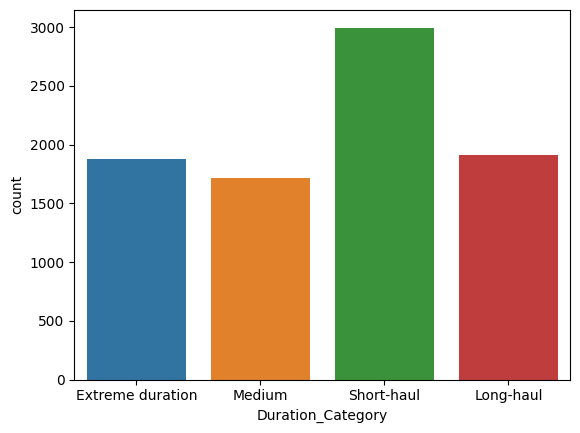

In [5]:
# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions, 
                                        flight_categories,
                                        default="Extreme duration")

# Plot the counts of each category
sns.countplot(data=planes, x="Duration_Category")
plt.show()